<a href="https://colab.research.google.com/github/walukas1/DeepDiveDSProjects/blob/main/Project%201/Draft_Project_1_Transaction_Predictions_Walukas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Transaction Success Predictions

---
---
## Problem Definition
Predict whether a transaction will be successful based on given variables


###Guiding questions
- What is the business problem?  Often some variant of saving time, saving money, and/or making money.
  - predict whether or not a future customer will make a transaction based on their transaction data.
- What data science problem is this? ( supervised or unsupervised )
  - Gaussian Naive Bayes classification techniques

- If **supervised** ...
  - how did you determine what is the target? What is the target?  successful or unsucessful transations (0 and 1) categorical supervised nominal (coded binary)
  - what statistical data type is the target: numerical or **categorical**?
  - would this be a **classification** or a regression problem?
- If unsupervised ...
  - what kind of clustering problem?




---
---
## Data Collection/Sources


###Guiding questions
- where is the data source located: local file, database, website, API, other?
  - https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv

- where is the data dictionary?
- how many bytes ( KB, MB, GB, TB ) is the data set?
- what tools did/would you use to get and read the data?
  - pandas, numpy and matplot lib

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, model_selection
from sklearn.naive_bayes import GaussianNB

Load training data as csv file and convert to data frame

In [36]:
train_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'
train = pd.read_csv(train_path)

---
---
## Data Cleaning


###Guiding Questions
- how can/did you discover how many rows?
- how can/did you discover how many columns?
- how can/did you discover if there are any unique identifiers and how would/did you handle them?
- how can/did you discover if there are any nulls and how would/did you handle them?
- if supervised, how can/did you discover if there are any nulls in your target and how would/did you handle them?
- how can/did you discover if there are any duplicates and how would/did you handle them?
- how can/did you discover if there are any missing values and how would/did you handle them?
- how can/did you discover if there are any nested fields and how would/did you handle them?





###Get to know the data set



Data frame
- 180000 rows
- 53 columns
- 9540000 elements
- no nulls

Target
- binary values only
- no nulls
- 180000 rows

In [37]:
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


Get size and shape

In [38]:
train.size, train.shape

(9540000, (180000, 53))

Check for nulls and duplicates in general data frame

In [39]:
train_nulls = train.isnull().sum().sum()
print(f'Nulls in data frame:{train_nulls}')

duplicates = train.duplicated().sum()
print(f'Duplicates in data frame:{duplicates}')

Nulls in data frame:0
Duplicates in data frame:0


Check target for unique values and nulls and duplicates

In [40]:
target_values = train['target'].unique()
print(f'Values in target: {target_values}')

target_nulls = train['target'].isnull().sum()
print(f'Nulls in target:{target_nulls}')

Values in target: [0 1]
Nulls in target:0


In [65]:
successful_transactions = train['target'].sum()
print(f'Successful transactions: {successful_transactions}, Percent: {successful_transactions/(successful_transactions + unsuccessful_transactions)}') ## Do this
unsuccessful_transactions = train['target'].count()-train['target'].sum()
print(f'Unsuccessful transactions: {unsuccessful_transactions}, Percentage {unsuccessful_transactions/(successful_transactions + unsuccessful_transactions)}') ## Do this

Successful transactions: 18040, Percent: 0.10022222222222223
Unsuccessful transactions: 161960, Percentage 0.8997777777777778


### Tidy up!


Make a copy of data frame

In [42]:
tidy_train = train.copy()
tidy_train.head(n=1)

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.747,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803


Drop 'ID_code' and second index column

In [66]:
tidy_train.drop([tidy_train.columns[0],'ID_code'],axis = 'columns', inplace = True)
tidy_train.head(n=1)

KeyError: "['ID_code'] not found in axis"

In [67]:
tidy_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


Create two data frames: one with all successful transactions, one with all unsuccessful transactions

In [55]:
tidy_train_bak = tidy_train.copy()
st_df = tidy_train[tidy_train['target']==1] #Successful transactions dataframe
ut_df = tidy_train[tidy_train['target']==0] #Unsuccessful transactions dataframe

Check if successful transactions + unsucessful transation = total data set
(they do)

In [45]:
row_s, col_s, row_u, col_u = (*st_df.shape, *ut_df.shape)
print(row_u)
print(row_s)
row_s + row_u

161960
18040


180000

---
---
## Exploratory Data Analysis


1. Produce some visual analysis of the data – like plots showing the distributions of all variables. Recall that Gaussian Naive Bayes assumes the predictors are normally distributed. Note: you might have to do multiple plots in groups.

1. NOTE: the ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column. (done in previous section)

1. Check the correlation values between all predictor columns to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.
1. Create two data frames: one with all successful transactions, one with all unsuccessful transactions. Make sure they are copies and not slices.

###Guiding Questions
- if supervised, what data type is your target?  What does that suggest for the type of ML process you will use?
- what is the distribution of values for your target?
- how can/did you discover which fields are categorical?
- how can/did you discover which fields are numerical?
- for each field, what is the distribution?
- how can/did you discover the relationship between any two variables?




In [46]:
tidy_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,180000.0,10.678650,3.041036,0.4084,8.451675,10.52675,12.756200,20.3150
var_1,180000.0,-1.630045,4.050519,-15.0434,-4.745600,-1.61125,1.360225,10.3768
var_2,180000.0,10.712922,2.639146,2.1171,8.720000,10.57960,12.514100,19.3530
var_3,180000.0,5.408688,0.866265,2.3473,4.768500,5.38560,6.003200,8.4477
var_4,180000.0,7.566953,1.235043,3.9705,6.618800,7.62850,8.583800,11.1506
var_5,180000.0,14.024017,0.190038,13.4346,13.893900,14.02550,14.164400,14.6545
var_6,180000.0,8.528080,4.641700,-6.0111,5.065750,8.59920,12.273300,22.3315
var_7,180000.0,15.243424,7.851050,-10.6642,9.170200,15.19890,21.010500,41.7480
var_8,180000.0,17.264876,8.203204,-10.0890,11.552000,17.24685,23.100050,49.0443


Histograms of all variable to check normal distribution (essential for Naive Bayes)

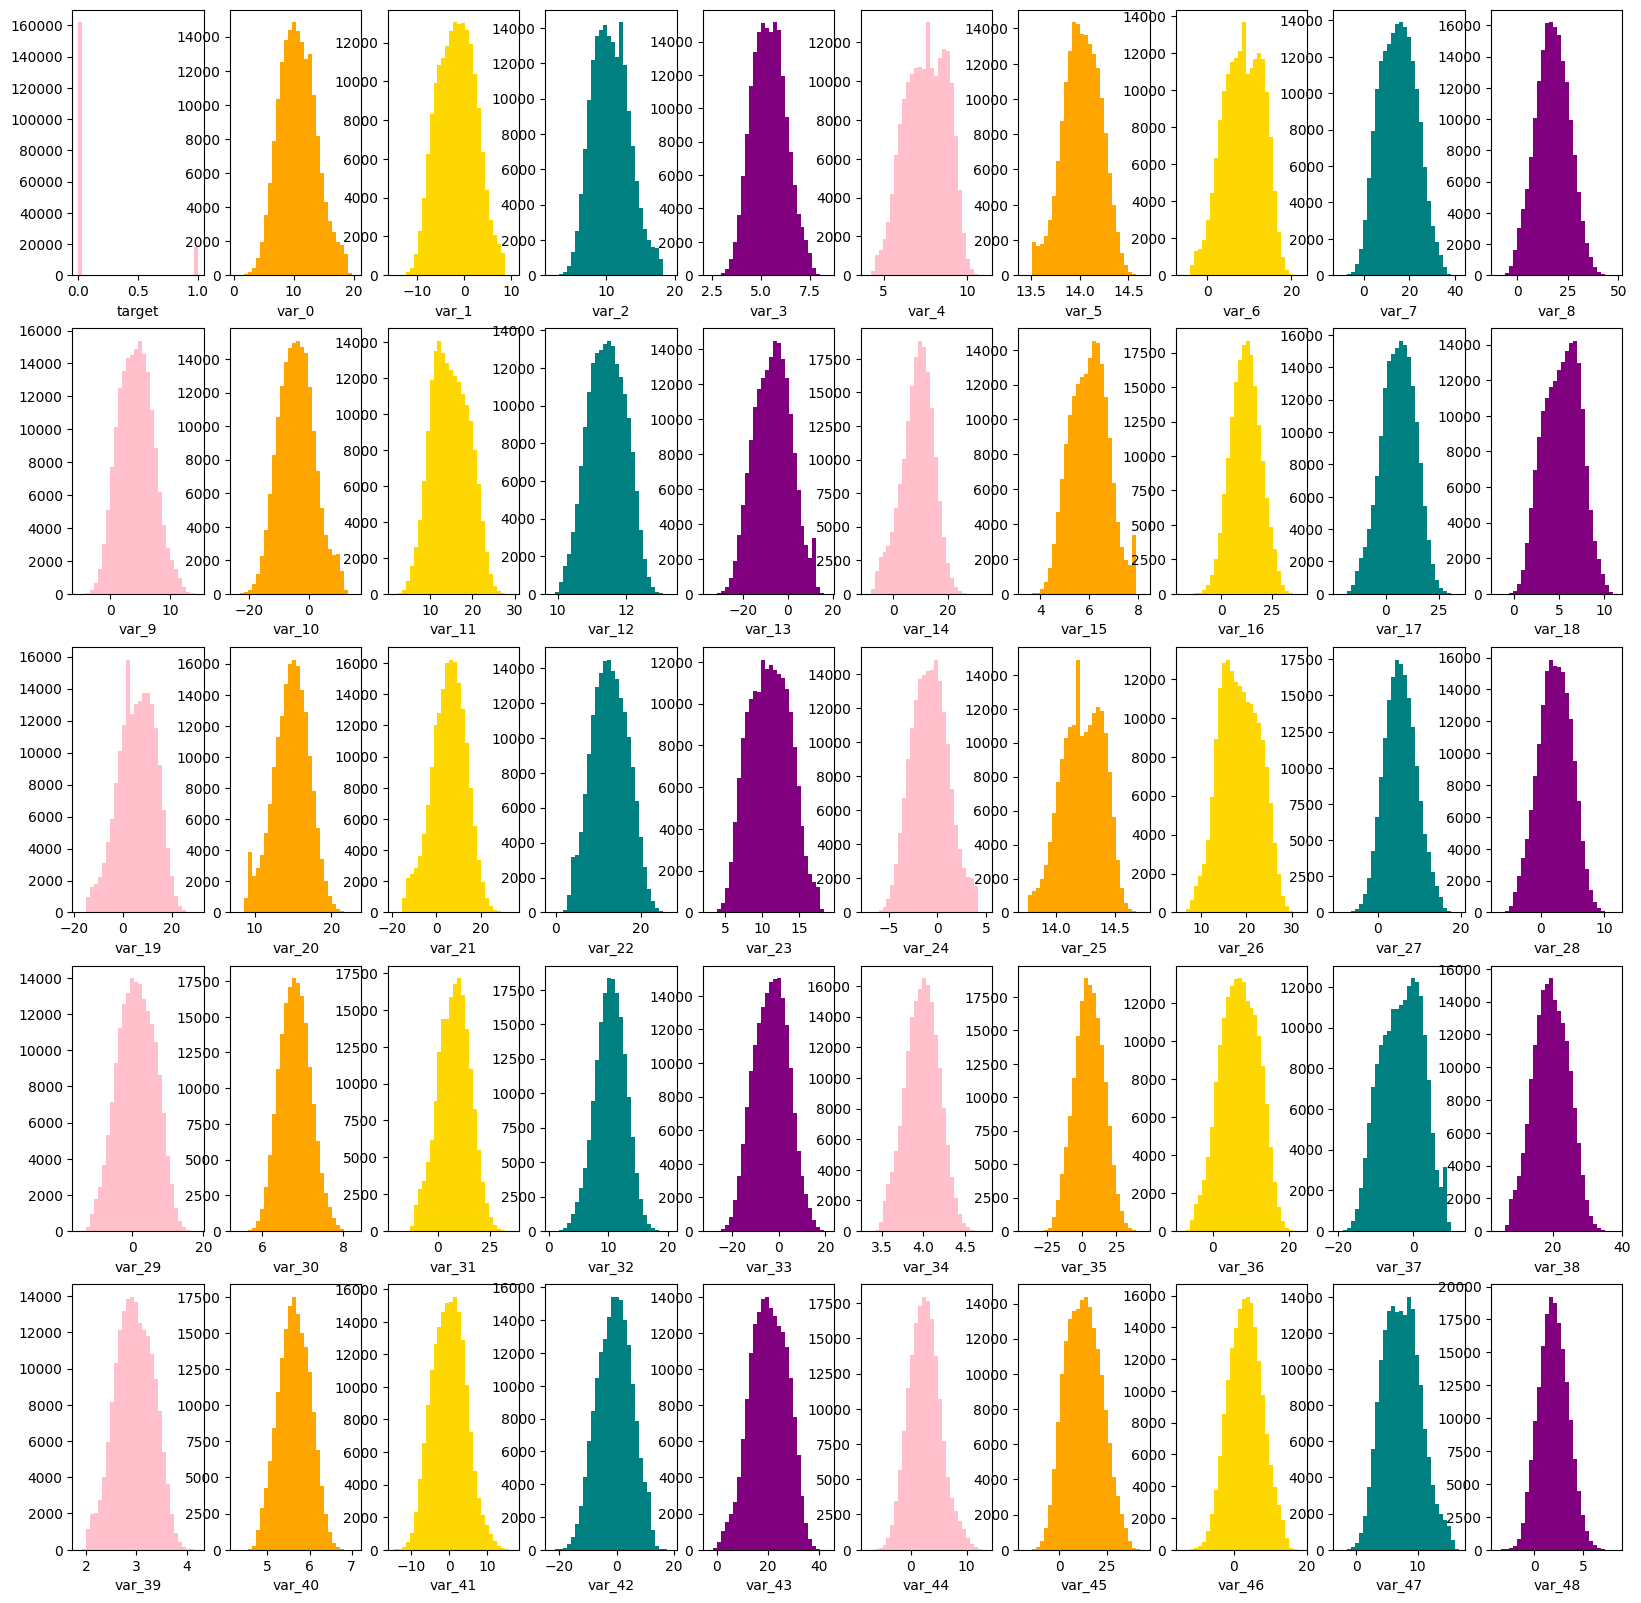

In [47]:
fig, axs = plt.subplots(nrows = 5, ncols = 10, figsize = (20,20))
colors = ['pink', 'orange', 'gold', 'teal','purple']

n = 0
for i in range(5):
  for j in range(10):
    column = tidy_train.columns[n]
    axs[i,j].hist(tidy_train[column], color = colors[n % 5], bins=30)
    axs[i,j].set_xlabel(column)
    n += 1

Correlation heat map

Check the correlation values between all predictor columns to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.

<Axes: >

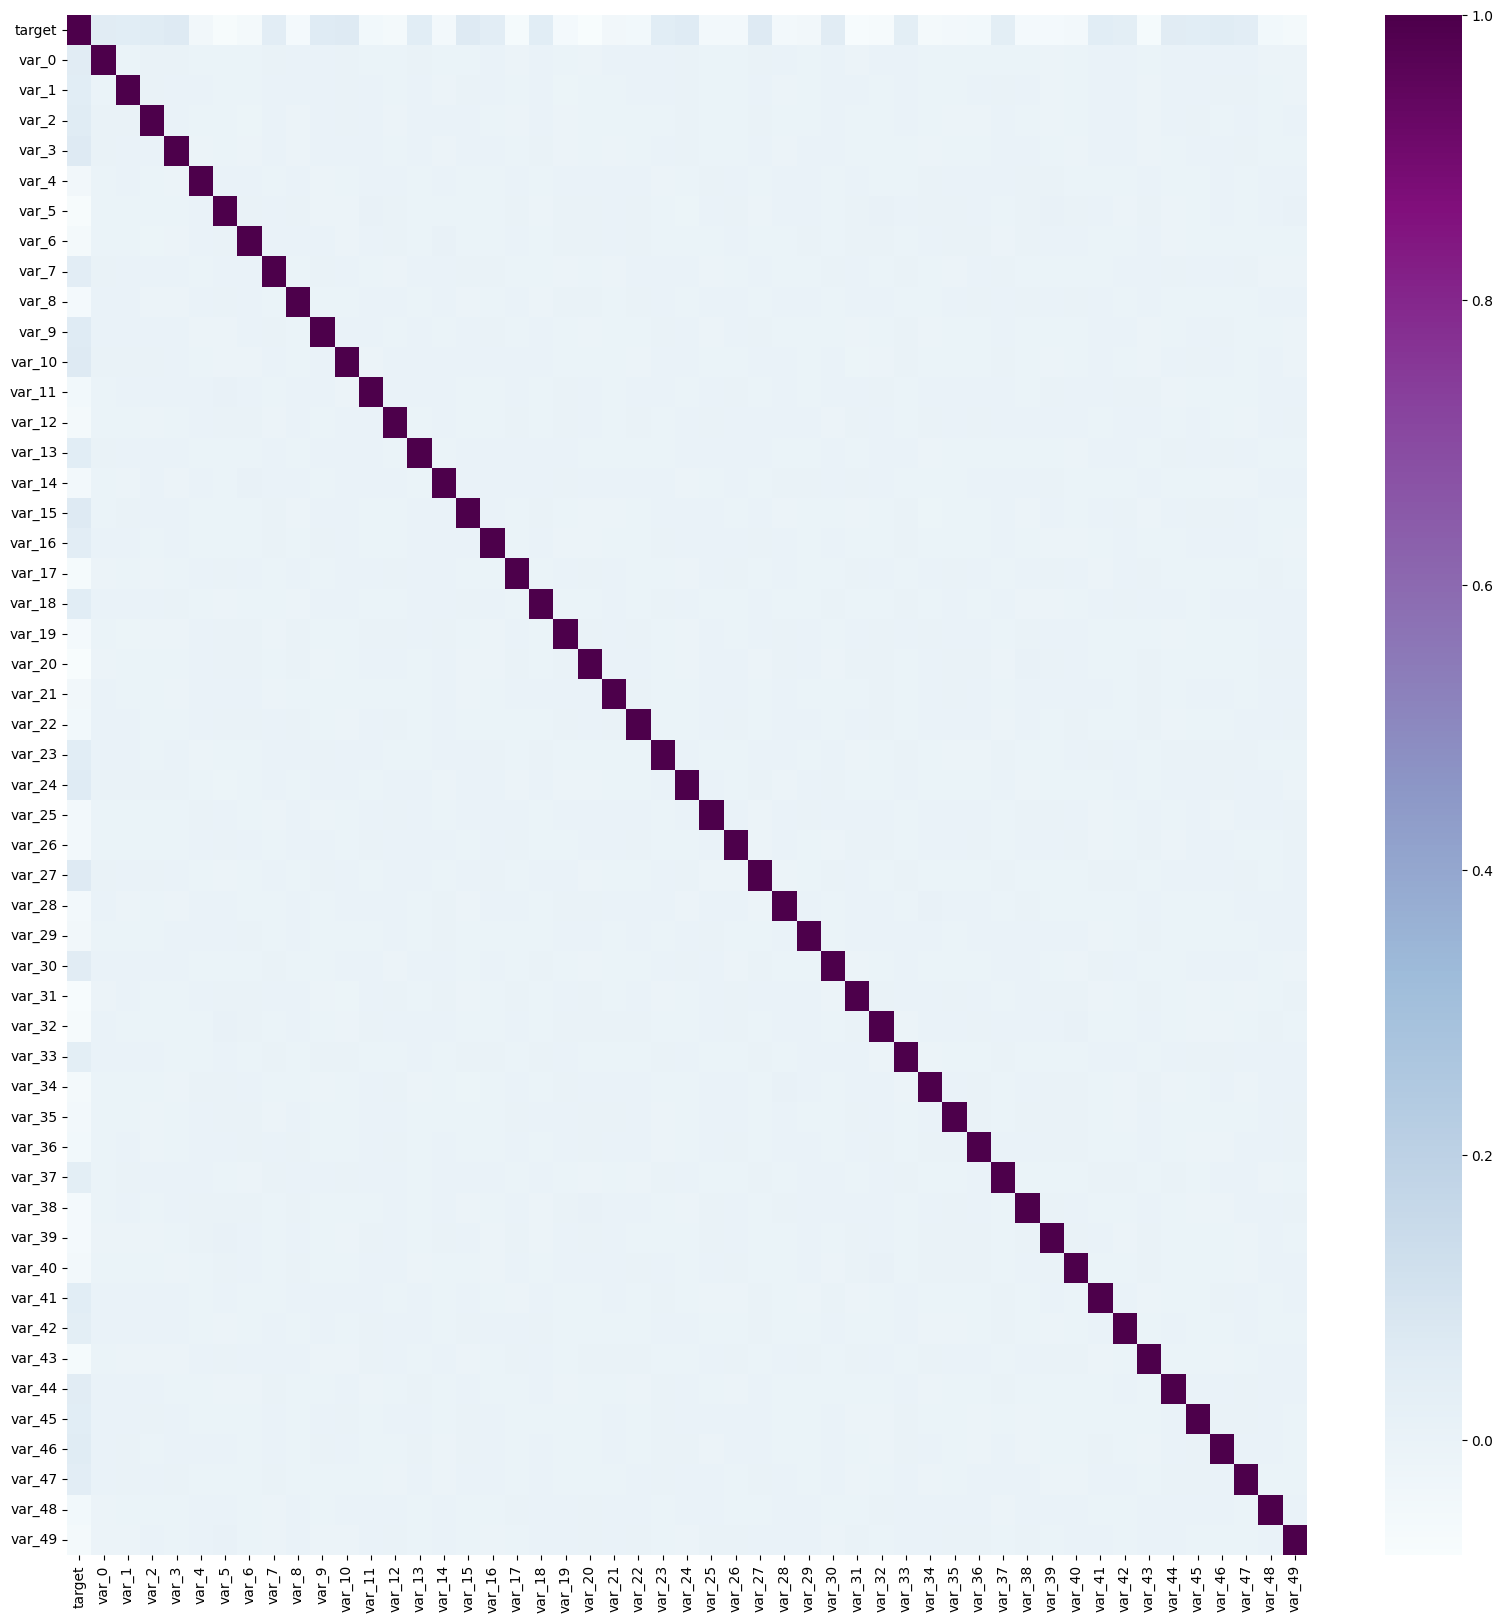

In [48]:
corr = tidy_train.corr()
corr
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='BuPu')

Correlation with target
(all very low)


In [49]:
corr['target']

,target
target,1.000000
var_0,0.052904
var_1,0.049916
var_2,0.055450
var_3,0.066924
var_4,-0.042073
var_5,-0.070015
var_6,-0.054375
var_7,0.044769
var_8,-0.057378


---
---
## Processing

1. Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.
1. Define a Gaussian Naïve Bayes model using Sklearn.
1. Divide the two data frames you created in step #10 into training and testing subsets.
1. Train the model using the training subset of the dataset.
1. Test the model using the testing subset of the dataset. Calculate and report the accuracy.
Perform a cross-validation loop to calculate the accuracy of your model. Report that accuracy. How does it compare to the accuracy you calculated in #14?
1. Plot a histogram of the accuracy scores you generated in your cross-validation loop. What do you notice about the distribution of accuracy scores?
1. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report). What do you notice?
The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions. Hint: you can use the data frames you created in step #9.
1. Repeat the cross-validation process on this data set. Report what your cross-validation accuracy is in this 50/50 case


- what questions did you ask to determine which ML process to use?
  - NB (assumes normal distribution of predictors)
- how did/can you determine what performance metric to use?  What others could you have used?  Which metrics might not be appropriate?
- how did/can you account for the variance/bias trade-off?









In [50]:
target = tidy_train['target'] #Target data frame (y)
features = tidy_train.drop('target', axis=1, inplace=False)#Train dataframe (x)
## This next part was borrowed from Robert

accuracy_scores = np.zeros(100)

for i in range(100):
  model_split_cv = GaussianNB() #make model
  X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size = 0.1) #split data (x = featutes, y= target)
  model_split_cv.fit(X_train, y_train) #fit model
  y_split_pred = model_split_cv.predict(X_test) # predict
  accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred) #measure accuracy

In [51]:
print(round(accuracy_scores.mean(), 5)*100)

91.11399999999999


Confusion matrix of one cross validation run

[Titanic example with confusion matrix](https://colab.research.google.com/drive/1oMA8pZg783aGXGqRIiA6w4rhgYQ1T0Pt#scrollTo=RibFcyEB3z8H)

Show histogram of accuracy scores

(array([ 2.,  5., 11., 14., 20., 19., 16.,  7.,  2.,  4.]),
 array([0.90633333, 0.90731667, 0.9083    , 0.90928333, 0.91026667,
        0.91125   , 0.91223333, 0.91321667, 0.9142    , 0.91518333,
        0.91616667]),
 <BarContainer object of 10 artists>)

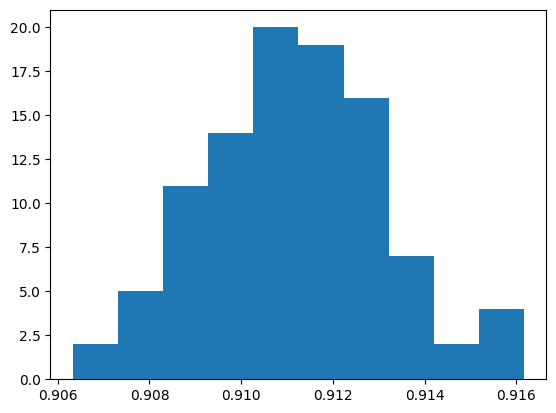

In [52]:
plt.hist(accuracy_scores, bins = 10)

OK YES BUT UNBALANCED DATA SET
~160000 unsuccessful transations
~18000 successful transactions

Take random sampling of equal number unsuccessful transactions

and rerun NM and cross validation

In [61]:
ut_df_balanced = ut_df.sample(18040)
balanced_df = pd.concat([ut_df_balanced,st_df])
balanced_target = balanced_df['target']
balanced_target
balanced_df = pd.concat([ut_df_balanced,st_df]).drop('target', axis = 1, inplace = False)
balanced_df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
137392,12.2925,1.9388,9.7120,5.1980,5.4479,13.7887,10.9771,10.4311,13.9831,6.3784,...,5.3623,-1.0757,3.6627,14.2573,-0.1412,6.8260,2.2211,9.5291,0.7232,19.4494
16783,12.7078,-2.3436,8.8916,6.3375,6.6255,14.0794,10.7122,6.7586,20.2579,7.1409,...,5.3795,2.0986,3.7867,29.6309,-0.0935,-0.7922,5.5678,7.5677,4.4111,13.1592
176886,9.1626,-6.9474,12.8855,6.9663,8.6053,14.2865,7.2480,17.8830,17.7466,5.0944,...,5.8258,4.3626,2.9783,15.0693,2.6308,4.0612,10.9891,8.7915,1.9156,16.1675
53001,9.7018,3.5902,7.9735,6.1339,9.7466,14.2069,11.4490,6.2090,11.4792,0.9026,...,5.2681,0.0427,-4.9629,26.9738,-1.6759,5.1869,4.6235,8.4623,1.0545,10.0923
116520,7.6862,-0.4529,16.9736,6.5029,7.5882,14.0070,6.2754,17.0958,23.3110,-0.7515,...,5.4890,5.9581,4.7940,10.6100,3.4231,10.6030,3.4895,8.9803,-0.8376,15.8738


Run Cross Validation again but with the ballanced data set

In [62]:
accuracy_scores = np.zeros(100)

for i in range(100):
  model_split_cv = GaussianNB() #make model
  X_train, X_test, y_train, y_test = model_selection.train_test_split(balanced_df, balanced_target, test_size = 0.1) #split data (x = featutes, y= target)
  model_split_cv.fit(X_train, y_train) #fit model
  y_split_pred = model_split_cv.predict(X_test) # predict
  accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred) #measure accuracy

In [63]:
print(round(accuracy_scores.mean(), 5)*100)

75.3


Histogram of accuracy scores

(array([ 1.,  5.,  9., 16., 21., 13., 16.,  8.,  8.,  3.]),
 array([0.73808204, 0.74099224, 0.74390244, 0.74681264, 0.74972284,
        0.75263304, 0.75554324, 0.75845344, 0.76136364, 0.76427384,
        0.76718404]),
 <BarContainer object of 10 artists>)

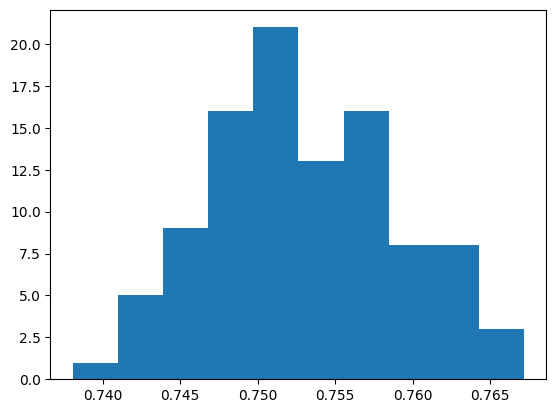

In [68]:
plt.hist(accuracy_scores, bins = 10)

---
---
## Data Visualization/Communication of Results
1. Compare the results of your cross-validation with the whole training data and the reduced 50/50 training data
1. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report)

- what plots did you use?  What did they show? What other visualizations could you have used?
- what could/should have been done to improve your performance metric?
- what constraints did you have while doing this project?  How could they be alleviated/mitigated?
- had you more resources, what else could you have done?
- what are your next steps?
